Loading Bitcoin price data...
Dataset Preview:
           ds            y
0  2020-01-01  7200.174316
1  2020-01-02  6985.470215
2  2020-01-03  7344.884277
3  2020-01-04  7410.656738
4  2020-01-05  7411.317383

Visualizing Bitcoin price trends...

Generating Bitcoin price forecasts with TimeGPT...

Forecasted Data:
          ds    TimeGPT  TimeGPT-hi-50  TimeGPT-hi-80  TimeGPT-hi-90  \
0 2024-01-01  42269.460      43158.164      44109.050      44971.670   
1 2024-01-02  42469.918      43473.414      44361.574      45241.890   
2 2024-01-03  42864.080      43443.895      44141.930      45189.332   
3 2024-01-04  42881.620      43704.770      44547.130      45160.117   
4 2024-01-05  42773.457      44057.152      44881.527      45333.210   

   TimeGPT-lo-50  TimeGPT-lo-80  TimeGPT-lo-90  
0      41380.758      40429.870      39567.250  
1      41466.420      40578.260      39697.945  
2      42284.260      41586.227      40538.824  
3      42058.473      41216.113      40603.125  
4     

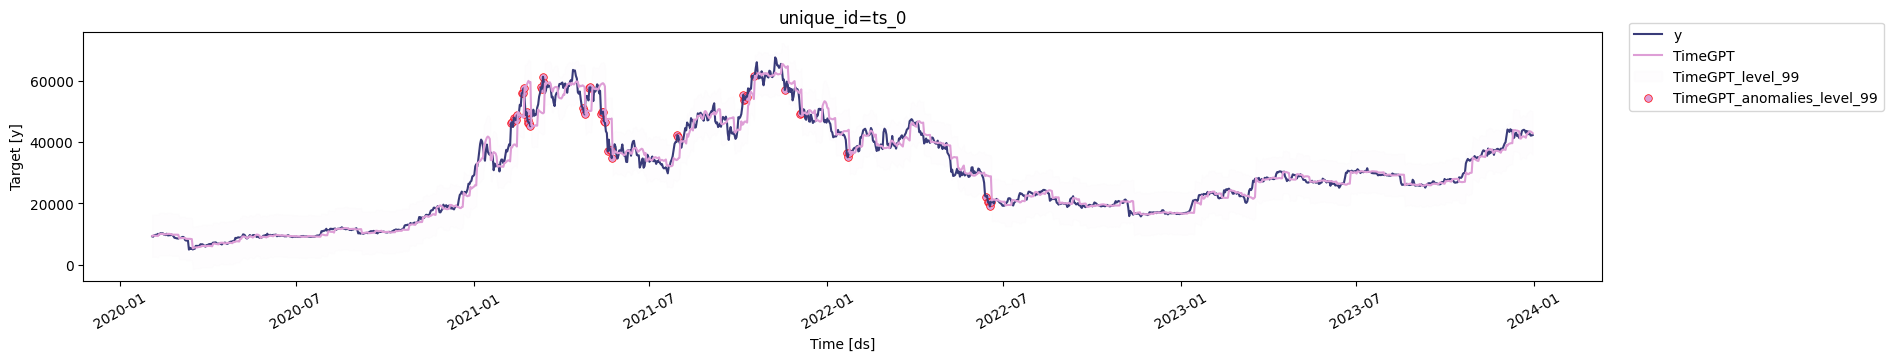

In [2]:
# Install necessary libraries
!pip install -Uqq nixtla cryptocmd

# Import required libraries
import pandas as pd
from nixtla import NixtlaClient
from google.colab import userdata

# Set up the Nixtla API key
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')  # Replace this with your API key if not using Colab
nixtla_client = NixtlaClient(api_key=NIXTLA_API_KEY)

# Load Bitcoin price dataset
print("Loading Bitcoin price data...")
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/bitcoin_price_usd.csv', sep=',')

# Rename columns to match the format required by TimeGPT
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Preview the dataset
print("Dataset Preview:")
print(df.head())

# Visualize the historical Bitcoin prices
print("\nVisualizing Bitcoin price trends...")
nixtla_client.plot(df)

# Forecast future Bitcoin prices with TimeGPT
print("\nGenerating Bitcoin price forecasts with TimeGPT...")
forecast_horizon = 7  # Forecast the next 7 days
confidence_levels = [50, 80, 90]  # Confidence intervals

# Perform the forecast
fcst = nixtla_client.forecast(df, h=forecast_horizon, level=confidence_levels)

# Preview the forecasted data
print("\nForecasted Data:")
print(fcst.head())

# Plot the forecasted Bitcoin prices with historical data
print("\nVisualizing Bitcoin price forecasts...")
nixtla_client.plot(df, fcst, level=confidence_levels)

# Zoom into the last 60 historical observations for a closer look
print("\nZooming into the last 60 historical data points and forecast...")
nixtla_client.plot(df, fcst, level=confidence_levels, max_insample_length=60)

# Generate predictions for historical data as well
print("\nGenerating predictions for historical data (in-sample forecasts)...")
forecast_with_history = nixtla_client.forecast(df, h=forecast_horizon, level=confidence_levels, add_history=True)

# Preview in-sample forecasts
print("\nIn-Sample Forecast Data:")
print(forecast_with_history.head())

# Visualize the in-sample forecasts
print("\nVisualizing in-sample forecasts...")
nixtla_client.plot(df, forecast_with_history, level=confidence_levels)

# Perform anomaly detection on the Bitcoin dataset
print("\nDetecting anomalies in Bitcoin price data...")
anomalies_df = nixtla_client.detect_anomalies(df)

# Visualize detected anomalies
print("\nVisualizing anomalies in Bitcoin price data...")
nixtla_client.plot(df, anomalies_df, plot_anomalies=True)

